# 텍스트 분석(경남 빅데이터 공모전 서론 part)

- 창원시에 대해 기사들이 다루어진 내용들에 대해 워드클라우드를 그려보고자 함
- 기사는 모든 언론사들을 포함함
- 22.7 ~ 23.7 까지 총 1년치의 데이터를 사용

In [1]:
import pandas as pd
df = pd.read_csv("./NewsResult_20220707-20230707(창원시).csv")
df.head(5)

,뉴스 식별자,일자,언론사,기고자,제목,통합 분류1,통합 분류2,통합 분류3,사건/사고 분류1,사건/사고 분류2,사건/사고 분류3,인물,위치,기관,키워드,특성추출(가중치순 상위 50개),본문,URL,분석제외 여부
0,1.100701e+06,20230707,세계일보,강승우,"최재호 무학 회장, 육군 39사단 초급장교 대상 건전음주교육 실시",지역>강원,지역>충북,지역>부산,NaN,NaN,NaN,"최재호,강인한",초급장교,"무학,육군,제39보병사단","회장,최재호,무학,건전음주교육,육군,사단,초급,장교,대상,건전,음주,교육,음주,사고...","무학,최재호,건전음주교육,블랙아웃,음주량,생산시설,사람들,굿데이,뮤지엄,군인정신,소...",음주사고 예방하고 건전음주 문화 조성을 위해 무학이 진행하고 있는 2023 건전음주...,http://www.segye.com/content/html/2023/07/07/2...,NaN
1,1.100701e+06,20230707,세계일보,강승우,"창원시, 관광시설 운영 중단 후속 조치 마련 계획",지역>제주,지역>경기,지역>충남,NaN,NaN,NaN,김은자,"용지호수공원,진해,창원,창원특례시 관광종합개발계획,창원시,경남,도심,마산","정부,시티투어버스,자원,창원,문체부,창원시,창원시청","창원시,계획,관광,시설,운영,중단,후속,조치,마련,경남,창원시,용지호수,공원,무빙보...","짚트랙,사용료,무빙보트,코로나19,창원,사업자,관광객,진해,김은자,관광산업,로드맵,정상화","경남 창원시는 용지호수공원 무빙보트, 창원솔라타워 짚트랙 등 지역 대표 관광시설 운...",http://www.segye.com/content/html/2023/07/07/2...,NaN
2,1.300101e+06,20230707,강원도민일보,조형연,작은더위 '소서' 무색한 '폭염' 수도권 강원 낮 최고 34도 '무더위',사회>날씨,지역>제주,지역>경북,재해>자연재해>폭염,NaN,NaN,NaN,"서해,강릉,서울,삼척,평지,남해안,강원,평창,태백,동해안,대전,세종,남해,춘천,광주...","울산,강원도,제주,제주도","더위,소서,폭염,수도권,강원,무더위,최고,소서,小暑,ㆍ작,더위,금요일,강원도,구름,...","sim,강릉,제주,춘천,동해,울산,전주,대구,강원,광주,창원,32도,부산,인천,소서...",소서(小暑ㆍ작은 더위)이자 금요일인 7일 강원도는 구름이 많다가 오후부터 차차 맑아...,www.kado.net/news/articleView.html?idxno=1192538,NaN
3,2.100601e+06,20230707,한국경제,김해연,SK오션플랜트 “함께 성장할 지역 인재 모십니다”,경제>취업_창업,경제>산업_기업,NaN,NaN,NaN,NaN,이승철,"아시아,미국,일본,대만,그린시티,한국,경남,베트남,호주","창원컨벤션센터,SK에코플랜트,SK그룹,SK오션플랜트","SK오션플랜트,성장,지역,인재,SK오션플랜트,채용박람회,경상남도,주력,산업,채용,박...","sk오션플랜트,부스,구조물,sk,구직자,관계자,상반기,경상남도,박람회,채용박람회,이...",SK오션플랜트가 ‘경상남도 주력산업 채용박람회’에 참가해 공개채용 시스템을 소개하는...,https://www.hankyung.com/economy/article/20230...,NaN
4,1.100701e+06,20230707,세계일보,강승우,"한국전기연구원-중앙대, 과학기술 전문인력 양성 업무 협약",IT_과학>과학,경제>반도체,경제>취업_창업,NaN,NaN,NaN,"김남균,박상규","캐나다,워털루,대한민국","KERI,중앙대,유일,한국전기연구원,중앙대학교","한국전기연구원,중앙대,협약,과학,전문,인력,양성,업무,한국전기연구원,KERI,중앙대...","중앙대,전기화,keri,ai,반도체,선도국,우리나라,네트워크,김남균,대학원,워털루,...",한국전기연구원(KERI)은 중앙대학교와 과학기술 분야 학연 교류 활성화를 위한 업무...,http://www.segye.com/content/html/2023/07/07/2...,NaN


In [2]:
# Tfidf를 이용한 해당 기사들의 본문 내용에 대해 단어 빈도 분석을 실행
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=2000, min_df=5, max_df=0.5)
X_train_tfidf = tfidf.fit_transform(df.본문) # 본문을 이용하여 TF-IDF를 학습하고, 변환

print(tfidf.get_feature_names_out()[:100]) # tfidf에 사용된 feature 이름을 반환

['0도' '0시' '10' '100' '100만' '100여' '10개' '10년' '10대' '10명' '10시' '10월'
 '10일' '11' '11명' '11시' '11월' '11일' '12' '12월' '12일' '13' '13개' '13일' '14'
 '14개' '14일' '15' '15개' '15아트센터' '15의거' '15일' '16' '16개' '16일' '17' '17일'
 '18' '18개' '18일' '19' '1979년' '19일' '1년' '1도' '1로' '1만' '1명' '1명이' '1분기'
 '1순위' '1시' '1억' '1월' '1위' '1위를' '1일' '1일부터' '1조' '1차' '20' '2016년'
 '2017년' '2018년' '2019년' '2020년' '2021년' '2022' '2022년' '2023' '2023년'
 '2023년도' '2023시즌' '2024년' '2025년' '2027년까지' '20대' '20일' '21' '21일' '22'
 '22일' '23' '23일' '24' '24일' '24일까지' '25' '25일' '26' '26일' '27' '27일'
 '27일부터' '28' '28일' '29' '29일' '2개' '2년']


- 결과들을 보면 의미없는 단어들이 많이 나옴
- 따로 토큰화를 지정해줄 필요성이 있다고 판단

In [3]:
from konlpy.tag import Okt #konlpy에서 Twitter 형태소 분석기를 import
twitter_tag = Okt()

# 첫번째 본문에 대하여 각각의 토큰화를 지정하여 어떤 것이 가장 효율적인지를 판단
print('#전체 형태소 결과:', twitter_tag.morphs(df.본문[1]))
print('#명사만 추출:', twitter_tag.nouns(df.본문[1]))
print('#품사 태깅 결과', twitter_tag.pos(df.본문[1]))

#전체 형태소 결과: ['경남', '창원시', '는', '용지호수', '공원', '무빙', '보트', ',', '창원', '솔', '라', '타워', '짚', '트랙', '등', '지역', '대표', '관광', '시설', '운영', '중단', '에', '따른', '후속', '조치', '를', '마련', '하겠다고', '7일', '밝혔다', '.', '무빙', '보트', '는', '2017년', '9월', '개장', '해', '운영', '되다', '신종', '코로나바이러스', '감염증', '(', '코로나', '19', ')', '에', '따른', '사회', '적', '거리', '두기', '로', '매출', '이', '감소', '해왔다', '.', '이', '에', '시', '는', '공유', '재산', '사용', '료', '감면과', '지속', '적', '인', '홍보', '등', '으로', '사업자', '의', '운영', '상', '어려', '..']
#명사만 추출: ['경남', '창원시', '용지호수', '공원', '무빙', '보트', '창원', '솔', '타워', '짚', '트랙', '등', '지역', '대표', '관광', '시설', '운영', '중단', '후속', '조치', '마련', '무빙', '보트', '개장', '운영', '신종', '코로나바이러스', '감염증', '코로나', '사회', '거리', '두기', '매출', '감소', '이', '시', '공유', '재산', '사용', '료', '지속', '홍보', '등', '사업자', '운영']
#품사 태깅 결과 [('경남', 'Noun'), ('창원시', 'Noun'), ('는', 'Josa'), ('용지호수', 'Noun'), ('공원', 'Noun'), ('무빙', 'Noun'), ('보트', 'Noun'), (',', 'Punctuation'), ('창원', 'Noun'), ('솔', 'Noun'), ('라', 'Josa'), ('타워', 'Noun'), ('짚', 'Noun'), ('트랙', '

- 보통 워드클라우드에서는 명사만을 사용하여 워드클라우드 하는 것이 일반적이므로 nouns를 사용 
- 추가로 한글에서는 한 글자 단어는 의미없는 단어가 많으므로 두 글자 이상의 단어만으로 토큰화 지정

In [4]:
def my_tokenizer(doc):
    return [token for token in twitter_tag.nouns(doc) if len(token) >=2]

print("나만의 토크나이저 결과:", my_tokenizer(df.키워드[1]))

나만의 토크나이저 결과: ['창원시', '계획', '관광', '시설', '운영', '중단', '후속', '조치', '마련', '경남', '창원시', '용지호수', '공원', '무빙', '보트', '창원', '타워', '중단', '지역', '대표', '관광', '시설', '운영', '후속', '조치', '마련', '무빙', '보트', '개장', '운영', '감염증', '신종', '코로나바이러스', '코로나', '사회', '거리', '매출', '감소', '공유', '재산', '사용', '지속', '홍보', '사업자', '운영', '어려움', '노력', '지난달', '업체', '폐업', '창원', '시청', '전경', '대안', '도심', '체험', '시설', '도심', '체험', '시설', '관광', '자원', '볼거리', '거리', '거리', '내달', '시민', '의견', '수렴', '절차', '활용', '방안', '검토', '계획', '인명', '사고', '발생', '휴장', '상태', '트랙', '정상화', '사업자', '차례', '면담', '추진', '운영', '정상', '계획', '제출', '사업', '시행', '협약', '이행', '지속', '요청', '협약', '당사자', '원활', '협의', '노력', '만일', '원활', '협의', '협약', '법률', '검토', '행정', '절차', '예정', '판단', '사고', '코로나', '운영', '어려움', '공유', '재산', '사용', '차례', '사업자', '요구', '전액', '시비', '특혜', '형평성', '추가', '사용', '경제성', '용역', '경제', '행정', '협조', '유치', '트랙', '관광객', '관내', '공공', '기관', '업무', '협약', '인기', '방영', '예능', '프로그램', '촬영', '홍보', '코로나', '관광객', '시티투어', '버스', '도심', '순환', '버스', '수요', '관광지', '이용', '후기', '반영', '내달', '노선', 

In [9]:
# 토큰화를 지정한 후 다시 한 번 Tfidf를 진행

#위에서 설정한 토크나이저 지정
my_stopwords = ["경남", "지역", "사업", "지난","위해","지난해","이번","최근","관련","전국","한국","올해","오늘","운영","대한"]
df_title = TfidfVectorizer(max_features=2000, min_df=5, max_df=0.5, tokenizer=my_tokenizer,stop_words=my_stopwords)

df_DTM = df_title.fit_transform(df.본문) #본문을 이용하여 TF-IDF를 학습하고, 변환
print(df_title.get_feature_names_out()[:100]) # tfidf에 사용된 feature 이름을 반환

['가격' '가공' '가구' '가까이' '가끔' '가능' '가능성' '가덕도' '가동' '가량' '가로' '가수' '가스' '가야'
 '가운데' '가입' '가장' '가전' '가정' '가족' '가지' '가짜' '가치' '각각' '각종' '간담' '간부' '간첩'
 '갈등' '감독' '감사' '감사원' '감소' '감시' '강남' '강릉' '강소' '강수량' '강원' '강원도' '강제' '강조'
 '강화' '개막' '개막전' '개발' '개방' '개사' '개선' '개소식' '개월' '개인' '개장' '개정' '개정안' '개최'
 '개통' '개편' '개혁' '개화' '갤러리' '거나' '거래' '거리' '거점' '거제' '거제시' '거주' '거창' '거창군'
 '건강' '건립' '건물' '건설' '건의' '건조' '건축' '검사' '검증' '검찰' '검토' '게임' '겨울' '격차'
 '결과' '결의' '결정' '결정전' '결혼' '겸직' '경계' '경기' '경기도' '경기장' '경남대' '경력' '경보' '경북'
 '경상' '경상남도']


- 상위 10개 단어를 가로 막대그래프로 표현

[('추진', 177.9584966352499), ('가운데', 182.23043222225382), ('혐의', 183.6590436048241), ('정부', 187.46886092337203), ('대표', 189.0512223084041), ('기업', 196.78144303872847), ('의원', 203.2924883984948), ('특례시', 207.85771129516627), ('부산', 209.2008362335282), ('오전', 216.85549659720746), ('기온', 223.28828922128906), ('오후', 231.2662704636412), ('앵커', 231.52777786062524), ('센터', 235.47794100209677), ('서울', 236.88305913147394), ('경기', 239.02092693786608), ('지원', 241.92188834790412), ('산업', 294.95954283772596), ('기자', 342.9499566675732), ('창원시', 432.4596502998037)]


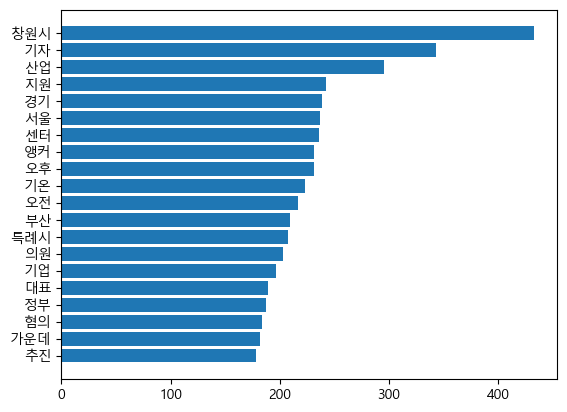

In [14]:
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np
%matplotlib inline

from matplotlib import font_manager, rc
import platform

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

const_cnt = {}
for word in df_title.get_feature_names_out():
    const_cnt[word] = np.sum(df_DTM[:, df_title.vocabulary_[word]])

def word_graph(cnt, max_words=10):
    
    sorted_w = sorted(cnt.items(), key=lambda kv: kv[1])
    print(sorted_w[-max_words:])
    n, w = zip(*sorted_w[-max_words:])

    plt.barh(range(len(n)),w,tick_label=n)
    plt.show()

word_graph(const_cnt, max_words=20)

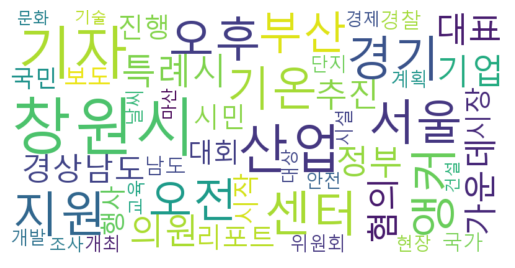

In [11]:
from wordcloud import WordCloud
font_path = 'c:/Windows/Fonts/malgun.ttf'

wordcloud = WordCloud(
    font_path = font_path,
    max_font_size = 100,
    width = 800, #이미지 너비 지정
    height = 400, #이미지 높이 지정
    background_color='white', #이미지 배경색 지정
    max_words=50)

wordcloud.generate_from_frequencies(const_cnt) #원문이 아닌 형태소 분석 결과로부터 워드클라우드를 생성

plt.axis("off")
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

# 2차 워드클라우드

- 창원시 전체로 보니 의료에 대한 분야가 나타나지 않음
- 창원시 관련된 기사들 중 의료에 관한 분야만 관련해서 주요 대두되고 있는 키워드가 무엇인지 파악

In [15]:
import pandas as pd
df = pd.read_csv("./NewsResult_20220708-20230708.csv")
df.head(5)

,뉴스 식별자,일자,언론사,기고자,제목,통합 분류1,통합 분류2,통합 분류3,사건/사고 분류1,사건/사고 분류2,사건/사고 분류3,인물,위치,기관,키워드,특성추출(가중치순 상위 50개),본문,URL,분석제외 여부
0,8.100101e+06,20230707,KBS,김민지,창원 진북터널 입구 화물차 추돌 1명 다쳐,사회>의료_건강,NaN,NaN,NaN,NaN,NaN,NaN,"진북면,진북터널,창원,창원시",NaN,"추돌,창원,진북터널,입구,화물차,1명,7일,창원시,진북면,진북터널,입구,트럭,트럭,...","운전자,화물차,창원시,진북터널,1명,창원,진북면,a씨,트럭,입구,사고,현장,추돌,병...",[KBS 창원]\n오늘(7일) 오전 11시 20분쯤 창원시 진북면 진북터널 입구에서...,https://news.kbs.co.kr/news/view.do?ncd=771863...,NaN
1,8.100101e+06,20230707,KBS,김민지,창원 진북터널 입구 화물차 추돌 1명 다쳐,사회>의료_건강,NaN,NaN,NaN,NaN,NaN,NaN,"진북면,진북터널,창원,창원시",NaN,"추돌,창원,진북터널,입구,화물차,1명,7일,창원시,진북면,진북터널,입구,트럭,트럭,...","운전자,화물차,창원시,진북터널,1명,창원,진북면,a씨,트럭,입구,사고,현장,추돌,병...",[KBS 창원]\n오늘(7일) 오전 11시 20분쯤 창원시 진북면 진북터널 입구에서...,https://news.kbs.co.kr/news/view.do?ncd=771848...,중복
2,1.100901e+06,20230707,중앙일보,서명수(seo.myongsoo@joongang.co.kr),"재료연, 창원한마음병원과 의료기술 협력 위한 협약 체결",사회>의료_건강,IT_과학>과학,NaN,NaN,NaN,NaN,"하충식,이정환","원천,경남도,창원,경남,경남지역","과학기술정보통신부,정부,재료연,창원한마음병원,한국재료연구원(KIMS,한양대학교,한국...","재료연,창원한마음병원,의료,협력,협약,체결,정부출연연구기관,과학기술정보통신부,산하,...","창원한마음병원,한양대학교,경남,의료기술,재료연,치료기,한국재료연구원,보건의료서비스,...",과학기술정보통신부 산하 정부출연연구기관인 한국재료연구원(KIMS)이 창원한마음병원과...,https://www.joongang.co.kr/article/25175673,NaN
3,1.100701e+06,20230707,세계일보,강승우,"한국전기연구원-중앙대, 과학기술 전문인력 양성 업무 협약",IT_과학>과학,경제>반도체,경제>취업_창업,NaN,NaN,NaN,"김남균,박상규","캐나다,워털루,대한민국","KERI,중앙대,유일,한국전기연구원,중앙대학교","한국전기연구원,중앙대,협약,과학,전문,인력,양성,업무,한국전기연구원,KERI,중앙대...","중앙대,전기화,keri,ai,반도체,선도국,우리나라,네트워크,김남균,대학원,워털루,...",한국전기연구원(KERI)은 중앙대학교와 과학기술 분야 학연 교류 활성화를 위한 업무...,http://www.segye.com/content/html/2023/07/07/2...,NaN
4,1.500601e+06,20230707,매일신문,문화부,[2023 매일 시니어문학상 수상작] 논픽션 부문 '무상 속에 걸어온 길' - 강두순,문화>출판,NaN,NaN,사고>스포츠사고,NaN,NaN,"신사임당,부처님,강 두순,최종학,황수관,방진우,이상인,병환,김 귀순,천주,두순,이순...","만학도,서울,경기,한국,지평,광주로,이란,포항,애틀랜타올림픽 역사 기념관,애틀랜타올...","진로,정신병,신용회복위원회,국민연,오뚜기,공군교육사령부,경북과학대학,삼척동자,대한,...","시니어,문학,수상작,논픽션,무상,논픽션,무상,강두순,머리말,인생,사건,사건,영광,영...","대한항공,미국,중학교,시간date,대한민국,희망퇴직,imf,지구촌,눈물",머리말 \n \n 내 인생에 두 번째 가라면 서러워할 사건이라면 사건이고 영광이라면...,https://news.imaeil.com/page/view/202306301035...,NaN


In [16]:
# Tfidf를 이용한 해당 기사들의 본문 내용에 대해 단어 빈도 분석을 실행
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=2000, min_df=5, max_df=0.5)
X_train_tfidf = tfidf.fit_transform(df.본문) # 본문을 이용하여 TF-IDF를 학습하고, 변환

print(tfidf.get_feature_names_out()[:100]) # tfidf에 사용된 feature 이름을 반환

['10' '100만' '10개' '10곳' '10년' '10대' '10시' '10여' '10월' '10일' '11' '119'
 '11살' '11세' '11시' '11월' '11일' '12월' '12일' '13일' '14일' '15개' '15일' '16명이'
 '16일' '17일' '18개' '18일' '19개' '19일' '1곳' '1년' '1년을' '1명' '1명은' '1명이'
 '1순위' '1시' '1시간' '1월' '1월부터' '1인당' '1일' '1조' '1차' '1호' '20' '200여'
 '2015년부터' '2018년' '2019년' '2020년' '2021년' '2022' '2022년' '2023' '2023년'
 '2023년도' '2023학년도' '2025년' '2026년까지' '2027년' '2027년까지' '20대' '20분쯤' '20여'
 '20일' '21일' '22일' '23개' '23명을' '23일' '24시간' '24일' '25' '25일' '26일' '27일'
 '28일' '29일' '2개' '2년' '2명' '2명은' '2명이' '2시' '2월' '2일' '2차' '2천' '2층' '30'
 '30년' '30대' '30여' '30일' '31일' '37' '3개' '3곳']


In [17]:
def my_tokenizer(doc):
    return [token for token in twitter_tag.nouns(doc) if len(token) >=2]

print("나만의 토크나이저 결과:", my_tokenizer(df.키워드[1]))

나만의 토크나이저 결과: ['추돌', '창원', '진북', '터널', '입구', '화물차', '창원시', '진북면', '진북', '터널', '입구', '트럭', '트럭', '트럭', '전도', '사고', '트럭', '운전자', '병원', '운전자', '트럭', '사고', '현장', '탈출']


In [18]:
#위에서 설정한 토크나이저 지정
my_stopwords = ["경남", "지역", "사업", "지난","위해","지난해","이번","최근","관련","전국","한국","올해","오늘","운영","대한"]
df_title = TfidfVectorizer(max_features=2000, min_df=5, max_df=0.5, tokenizer=my_tokenizer,stop_words=my_stopwords)

df_DTM = df_title.fit_transform(df.본문) #본문을 이용하여 TF-IDF를 학습하고, 변환
print(df_title.get_feature_names_out()[:100]) # tfidf에 사용된 feature 이름을 반환

['가격' '가공' '가구' '가기' '가까이' '가능성' '가동' '가량' '가속' '가수' '가스' '가슴' '가시' '가운데'
 '가을' '가장' '가전' '가정' '가족' '가지' '가치' '가해자' '각각' '각계' '각자' '각종' '각층' '간담'
 '간부' '간사' '간염' '간장' '간첩' '간호' '간호사' '갈등' '감독' '감사' '감사원' '감소' '감시' '감염'
 '감염병' '감염증' '갑자기' '갓길' '강기윤' '강남' '강소' '강아지' '강원' '강원도' '강조' '강좌' '강화'
 '개교' '개발' '개선' '개소' '개원' '개월' '개인' '개정' '개정안' '개척' '개최' '개편' '거나' '거래'
 '거리' '거점' '거제' '거제시' '거주' '거창' '거창군' '건강' '건강검진' '건립' '건물' '건설' '건설업'
 '건의' '건축' '걷기' '검거' '검사' '검진' '검찰' '검토' '게임' '겨울철' '격차' '견본주택' '결과' '결산'
 '결의' '결정' '결집' '결핍']


[('유치', 28.931721148598925), ('노동자', 29.052121561564068), ('오후', 29.70629756971067), ('시민', 29.854801381025496), ('의과대학', 31.035467878500626), ('발생', 31.18108991533016), ('오전', 31.5380563522637), ('중대', 33.47000308739627), ('보건', 33.85093628877223), ('지원', 34.07880862833092), ('앵커', 34.302683418164776), ('재해', 38.26016456646952), ('경찰', 38.81461627022976), ('안전', 41.335785556042175), ('산업', 46.173551694905534), ('기자', 48.27285907089878), ('사고', 53.44076354063124), ('의료', 57.615401330494706), ('창원시', 60.97689925137844), ('병원', 69.85233060461266)]


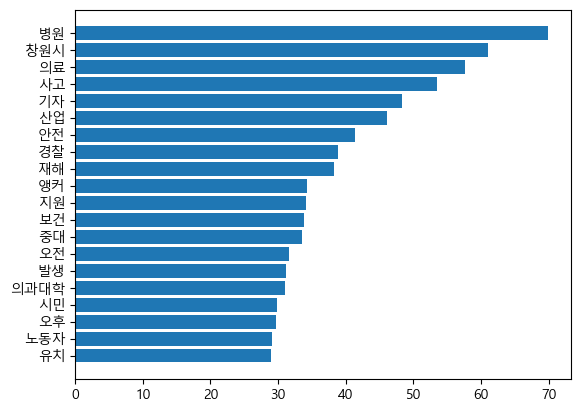

In [19]:
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np
%matplotlib inline

from matplotlib import font_manager, rc
import platform

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

const_cnt = {}
for word in df_title.get_feature_names_out():
    const_cnt[word] = np.sum(df_DTM[:, df_title.vocabulary_[word]])

def word_graph(cnt, max_words=10):
    
    sorted_w = sorted(cnt.items(), key=lambda kv: kv[1])
    print(sorted_w[-max_words:])
    n, w = zip(*sorted_w[-max_words:])

    plt.barh(range(len(n)),w,tick_label=n)
    plt.show()

word_graph(const_cnt, max_words=20)

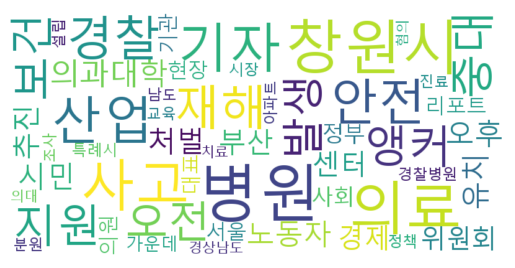

In [20]:
from wordcloud import WordCloud
font_path = 'c:/Windows/Fonts/malgun.ttf'

wordcloud = WordCloud(
    font_path = font_path,
    max_font_size = 100,
    width = 800, #이미지 너비 지정
    height = 400, #이미지 높이 지정
    background_color='white', #이미지 배경색 지정
    max_words=50)

wordcloud.generate_from_frequencies(const_cnt) #원문이 아닌 형태소 분석 결과로부터 워드클라우드를 생성

plt.axis("off")
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

## 토픽 트렌드
- 실제 창원시 워드클라우드 결과 의료에 관련된 분야는 별로 안나타남(우리에게 마이너스가 되는 부분)
- 따로 의료 관련 기사들만 가져와서 토픽 트렌드를 보고자 함(최근 6개월간 의료 관련에 대한 내용에 대해 관심도가 얼만큼 증가하였는지)
- 토픽모델링을 하면 다른 분야에 비해 상대적으로 해당 분야에 대한 관심도를 파악할 수 있지만 한 분야에 대해서만 절대적으로 수치 확인 불가능
- 토픽모델링은 적용X 판단 => 월 별 의료 분야에 대한 키워드 건수 증가로 대체
- 아래 코드는 토픽모델링 코드이므로 해당 대회에서 사용은 X

# 토픽 모델링(Gensim)

In [58]:
import pandas as pd

df = pd.read_csv("./NewsResult_20230107-20230707.csv")
df.head(5)

def tokenizer(doc):
    return [token for token in twit.nouns(doc) if len(token) > 1]

texts = [tokenizer(news) for news in df.본문]

In [59]:
from gensim.corpora.dictionary import Dictionary

# 토큰화 결과로부터 dictionay 생성
dictionary = Dictionary(texts)
print('#Number of initial unique words in documents:', len(dictionary))

# 문서 빈도수가 너무 적거나 높은 단어를 필터링하고 특성을 단어의 빈도 순으로 선택
dictionary.filter_extremes(keep_n=2000, no_below=5, no_above=0.5)
print('#Number of unique words after removing rare and common words:', len(dictionary))

# 카운트 벡터로 변환
corpus = [dictionary.doc2bow(text) for text in texts]
print('#Number of unique tokens: %d' % len(dictionary))
print('#Number of documents: %d' % len(corpus))

#Number of initial unique words in documents: 8558
#Number of unique words after removing rare and common words: 2000
#Number of unique tokens: 2000
#Number of documents: 2104


In [60]:
from gensim.models import LdaModel

num_topics = 3
passes = 5
%time model = LdaModel(corpus=corpus, id2word=dictionary,\
                       passes=passes, num_topics=num_topics, \
                       random_state=7)

Wall time: 10.7 s


In [61]:
model.print_topics(num_words=10)

[(0,
  '0.046*"본부" + 0.037*"지역" + 0.023*"금융" + 0.018*"과장" + 0.017*"경남" + 0.016*"사업" + 0.016*"산업" + 0.012*"전보" + 0.012*"투자" + 0.011*"파견"'),
 (1,
  '0.032*"경남" + 0.026*"창원" + 0.021*"관광" + 0.010*"지난해" + 0.009*"해양" + 0.009*"기자" + 0.008*"위해" + 0.007*"창원시" + 0.007*"버스" + 0.007*"지역"'),
 (2,
  '0.042*"창원" + 0.026*"특례시" + 0.022*"경남" + 0.017*"창원시" + 0.016*"사업" + 0.010*"산업" + 0.009*"지난해" + 0.008*"미래" + 0.008*"올해" + 0.008*"지난"')]